In [1]:
import pandas as pd

# Define the file path
file_path = "climate.csv"

# Read the CSV file
climate_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
climate_data.head()


,city,lon,lat,month,monthnum,sunshine
0,Chicago,-87.623177,41.881832,Jan,0,135
1,Chicago,-87.623177,41.881832,Feb,1,136
2,Chicago,-87.623177,41.881832,Mar,2,187
3,Chicago,-87.623177,41.881832,Apr,3,215
4,Chicago,-87.623177,41.881832,May,4,281


In [2]:
import pandas as pd
# Define the file path
file_path = "climate.csv"


# Read the CSV file
climate_data = pd.read_csv(file_path)

# Display 10 random rows from the dataset
random_rows = climate_data.sample(n=10)

# Get the size of the dataset (total number of elements)
dataset_size = climate_data.size

# Get the shape of the dataset (number of rows and columns)
dataset_shape = climate_data.shape

# Display the outputs
print("Random 10 Rows:")
print(random_rows)
print("\nSize of the dataset (total elements):", dataset_size)
print("Shape of the dataset (rows, columns):", dataset_shape)

Random 10 Rows:
             city         lon        lat month  monthnum  sunshine
64        Seattle -122.335167  47.608013   May         4       253
45       New York  -73.935242  40.730610   Oct         9       213
3         Chicago  -87.623177  41.881832   Apr         3       215
47       New York  -73.935242  40.730610   Dec        11       155
4         Chicago  -87.623177  41.881832   May         4       281
36       New York  -73.935242  40.730610   Jan         0       154
7         Chicago  -87.623177  41.881832   Aug         7       283
1         Chicago  -87.623177  41.881832   Feb         1       136
58  San Francisco -122.446747  37.733795   Nov        10       189
50  San Francisco -122.446747  37.733795   Mar         2       251

Size of the dataset (total elements): 432
Shape of the dataset (rows, columns): (72, 6)


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the data (assuming the climate dataset is available)
file_path = "climate.csv"
climate_data = pd.read_csv(file_path)

# Check for missing values
print("Missing values:\n", climate_data.isnull().sum())

# Convert month column to categorical with a proper order (optional but useful for visuals)
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
climate_data['month'] = pd.Categorical(climate_data['month'], categories=months_order, ordered=True)

# Check the data types and ensure they are appropriate
print(climate_data.dtypes)

# If necessary, convert columns to correct data types
climate_data['monthnum'] = pd.to_numeric(climate_data['monthnum'], errors='coerce')  # Ensure numeric
climate_data['sunshine'] = pd.to_numeric(climate_data['sunshine'], errors='coerce')  # Ensure numeric

# Handling any missing or invalid values (you could drop them, fill them, etc.)
climate_data.dropna(inplace=True)  # Dropping rows with missing values

# Basic summary statistics to understand the spread of sunshine hours
print(climate_data.describe())

# Aggregation for potential visualizations:
# 1. Average sunshine per city
city_sunshine_avg = climate_data.groupby('city')['sunshine'].mean().reset_index()

# 2. Average sunshine per month
month_sunshine_avg = climate_data.groupby('month')['sunshine'].mean().reset_index()

# 3. Average sunshine based on latitude and longitude
geo_sunshine_avg = climate_data.groupby(['lat', 'lon'])['sunshine'].mean().reset_index()

# Displaying the transformed dataframes
print("City-wise average sunshine:\n", city_sunshine_avg)
print("Month-wise average sunshine:\n", month_sunshine_avg)
print("Geographical average sunshine:\n", geo_sunshine_avg)


Missing values:
 city        0
lon         0
lat         0
month       0
monthnum    0
sunshine    0
dtype: int64
city          object
lon          float64
lat          float64
month       category
monthnum       int64
sunshine       int64
dtype: object
              lon        lat   monthnum    sunshine
count   72.000000  72.000000  72.000000   72.000000
mean   -96.981757  37.244306   5.500000  219.861111
std     19.258907   7.460586   3.476278   65.514928
min   -122.446747  25.761681   0.000000   52.000000
25%   -122.335167  29.749907   2.750000  176.250000
50%    -91.490799  39.232202   5.500000  224.000000
75%    -80.191788  41.881832   8.250000  271.250000
max    -73.935242  47.608013  11.000000  330.000000
City-wise average sunshine:
             city    sunshine
0        Chicago  208.666667
1        Houston  219.416667
2          Miami  241.916667
3       New York  223.083333
4  San Francisco  245.833333
5        Seattle  180.250000
Month-wise average sunshine:
    month    suns

/tmp/ipykernel_103208/1215321674.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_sunshine_avg = climate_data.groupby('month')['sunshine'].mean().reset_index()


In [3]:
!pip install pandas matplotlib seaborn geopandas

Defaulting to user installation because normal site-packages is not writeable


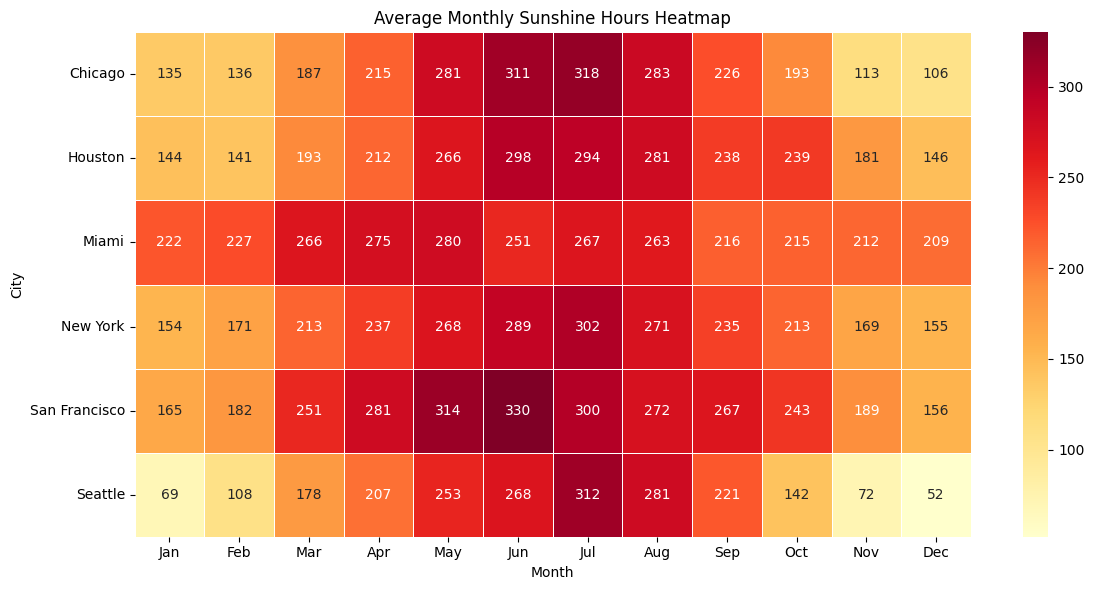

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#heatmap to visualize the average monthly sunshine hours across different cities, with each city displayed as a row and each month as a column.

# Create a pivot table to reshape the data for the heatmap
pivot_table = data.pivot(index='city', columns='month', values='sunshine')

# Ensure the months are in the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pivot_table = pivot_table[month_order]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create the heatmap using seaborn
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlOrRd', linewidths=.5)

# Customize the plot
plt.title('Average Monthly Sunshine Hours Heatmap')
plt.xlabel('Month')
plt.ylabel('City')

# Display the plot
plt.tight_layout()
plt.show()


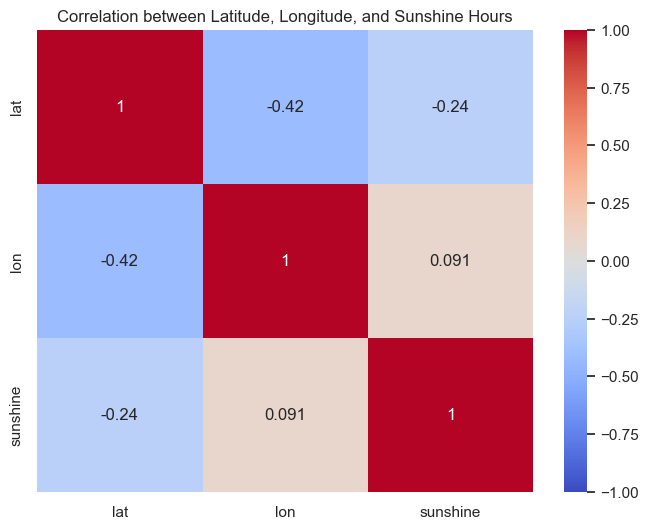

,lat,lon,sunshine
lat,1.000000,-0.419270,-0.238044
lon,-0.419270,1.000000,0.091353
sunshine,-0.238044,0.091353,1.000000


In [21]:
# To explore the correlation between latitude, longitude, and sunshine hours, we will calculate the correlation coefficients.
# Define the file path
file_path = "climate.csv"

# Read the CSV file
climate_data = pd.read_csv(file_path)
# Select the relevant columns for correlation analysis
correlation_data = climate_data[['lat', 'lon', 'sunshine']]

# Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot a heatmap to visualize the correlation
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Latitude, Longitude, and Sunshine Hours')
plt.show()

# Display the correlation matrix
correlation_matrix


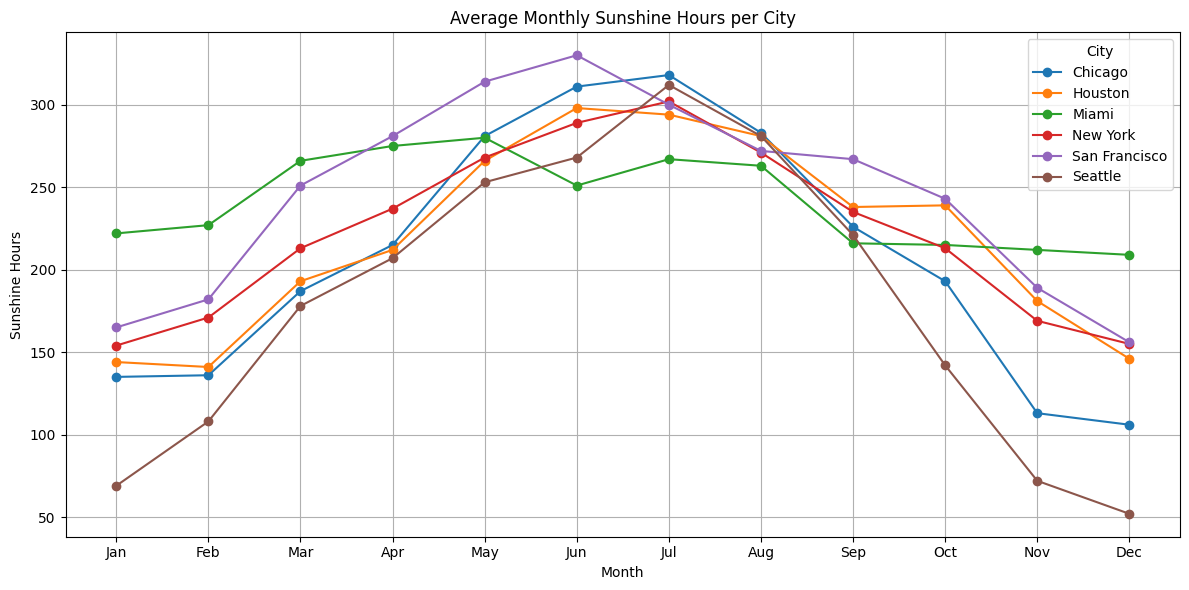

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# Ensure that the CSV file is in the same directory or provide the correct path
data = pd.read_csv(file_path)
# If the 'monthnum' column starts from 0 (0 for January), adjust it to start from 1
data['monthnum'] = data['monthnum'] + 1

# Create a pivot table to restructure the data for plotting
pivot_table = data.pivot_table(values='sunshine', index='monthnum', columns='city')

# Create a list of month labels for the x-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot the line chart
plt.figure(figsize=(12, 6))
for city in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[city], marker='o', label=city)

# Customize the plot
plt.title('Average Monthly Sunshine Hours per City')
plt.xlabel('Month')
plt.ylabel('Sunshine Hours')
plt.xticks(ticks=range(1, 13), labels=months)
plt.legend(title='City')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


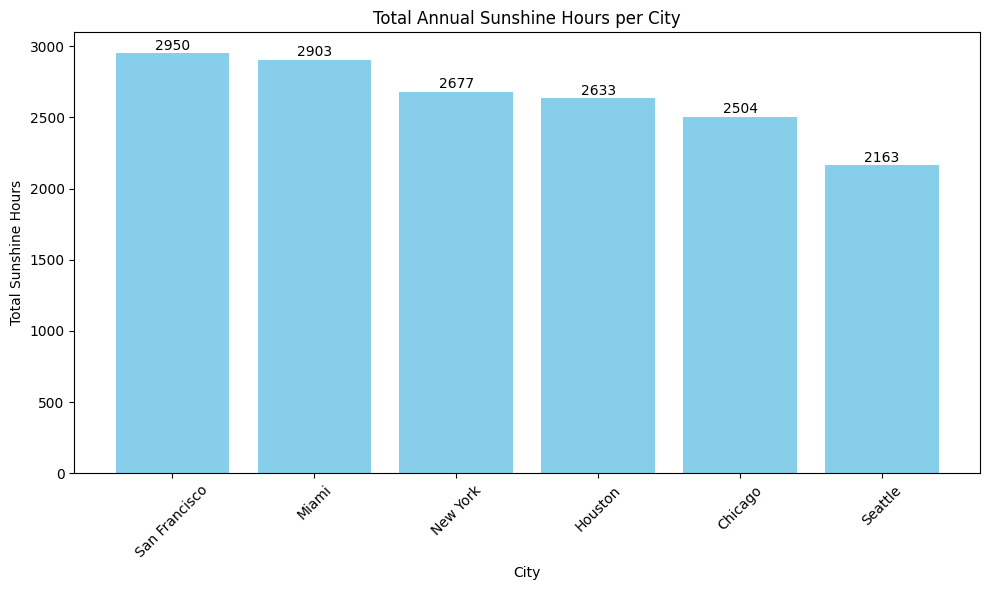

In [6]:
import pandas as pd
import matplotlib.pyplot as plt



# Calculate the total annual sunshine hours for each city
total_sunshine = data.groupby('city')['sunshine'].sum().reset_index()

# Sort the data in descending order for better visualization
total_sunshine = total_sunshine.sort_values(by='sunshine', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(total_sunshine['city'], total_sunshine['sunshine'], color='skyblue')

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval), ha='center', va='bottom')

# Customize the plot
plt.title('Total Annual Sunshine Hours per City')
plt.xlabel('City')
plt.ylabel('Total Sunshine Hours')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


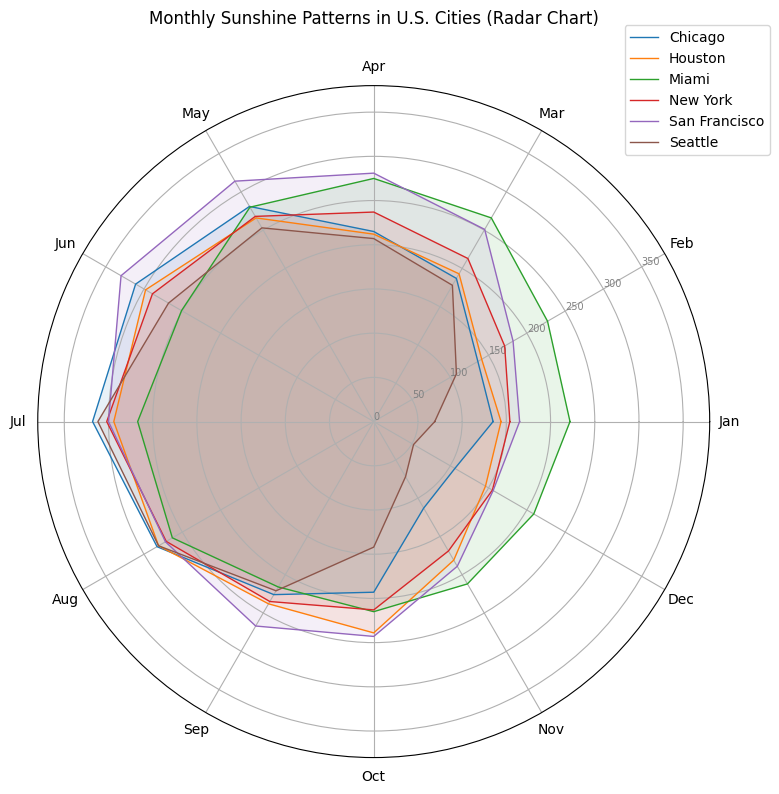

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Ensure the months are in the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_to_num = {month: i for i, month in enumerate(month_order)}
data['month_order_num'] = data['month'].map(month_to_num)

# Sort the data by city and month
data = data.sort_values(['city', 'month_order_num'])

# Pivot the data to have months as columns and cities as rows
pivot_table = data.pivot(index='city', columns='month', values='sunshine')
pivot_table = pivot_table[month_order]  # Ensure correct month order

# Number of variables we're plotting (number of months)
categories = month_order
N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot by the number of variables)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Complete the loop by appending the start angle at the end

# Initialize the radar plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Loop over each city and plot
for city in pivot_table.index:
    values = pivot_table.loc[city].tolist()
    values += values[:1]  # Repeat the first value to close the circular graph
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=city)
    ax.fill(angles, values, alpha=0.1)  # Optional: fill the area under the line

# Add labels for each angle
plt.xticks(angles[:-1], categories)

# Set the radial axis limits
max_sunshine = pivot_table.max().max()
ax.set_rlabel_position(30)
plt.yticks(range(0, int(max_sunshine) + 50, 50), color="grey", size=7)
plt.ylim(0, max_sunshine + 50)

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.title('Monthly Sunshine Patterns in U.S. Cities (Radar Chart)', y=1.08)

# Display the plot
plt.tight_layout()
plt.show()


In [8]:
!pip install contextily

Defaulting to user installation because normal site-packages is not writeable


In [9]:
!pip install geodatasets cartopy


Defaulting to user installation because normal site-packages is not writeable


In [10]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import geopandas as gpd
# from shapely.geometry import Point
# import contextily as ctx


# # Calculate the total annual sunshine hours for each city
# annual_sunshine = data.groupby(['city', 'lon', 'lat'])['sunshine'].sum().reset_index()

# # Create a GeoDataFrame for the cities
# geometry = [Point(xy) for xy in zip(annual_sunshine['lon'], annual_sunshine['lat'])]
# city_gdf = gpd.GeoDataFrame(annual_sunshine, geometry=geometry, crs="EPSG:4326")

# # Convert the coordinate reference system to Web Mercator (EPSG:3857) for plotting
# city_gdf = city_gdf.to_crs(epsg=3857)

# # Load a USA map using the cartopy package
# import cartopy.io.shapereader as shpreader

# usa = gpd.read_file(shpreader.natural_earth(resolution='110m', category='cultural', name='admin_0_countries'))
# usa = usa[usa['ADMIN'] == "United States of America"].to_crs(epsg=3857)

# # Plot the map
# fig, ax = plt.subplots(figsize=(12, 8))

# usa.plot(ax=ax, color='lightgray', edgecolor='white')

# # Normalize the sunshine data for marker sizes
# max_sunshine = city_gdf['sunshine'].max()
# min_sunshine = city_gdf['sunshine'].min()
# city_gdf['markersize'] = ((city_gdf['sunshine'] - min_sunshine) / (max_sunshine - min_sunshine) * 1000) + 100

# # Plot the cities with sunshine data
# scatter = city_gdf.plot(
#     ax=ax,
#     kind='scatter',
#     x='geometry.x',
#     y='geometry.y',
#     s='markersize',
#     c='sunshine',
#     cmap='YlOrRd',
#     alpha=0.7,
#     edgecolor='k',
#     legend=True,
#     legend_kwds={'label': "Annual Sunshine Hours", 'orientation': "vertical"}
# )
# # Add basemap tiles for better visualization (optional)
# ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite)

# # Customize the plot
# plt.title('Total Annual Sunshine Hours in U.S. Cities')
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')

# # Remove axis frames and ticks for a cleaner map look
# ax.set_axis_off()

# # Annotate the cities
# for idx, row in city_gdf.iterrows():
#     ax.annotate(
#         s=row['city'],
#         xy=(row.geometry.x, row.geometry.y),
#         xytext=(3, 3),
#         textcoords='offset points',
#         fontsize=9,
#         color='black'
#     )

# plt.tight_layout()
# plt.show()

/tmp/ipykernel_101644/3032081564.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='city', y='sunshine', data=data, palette="Set3")


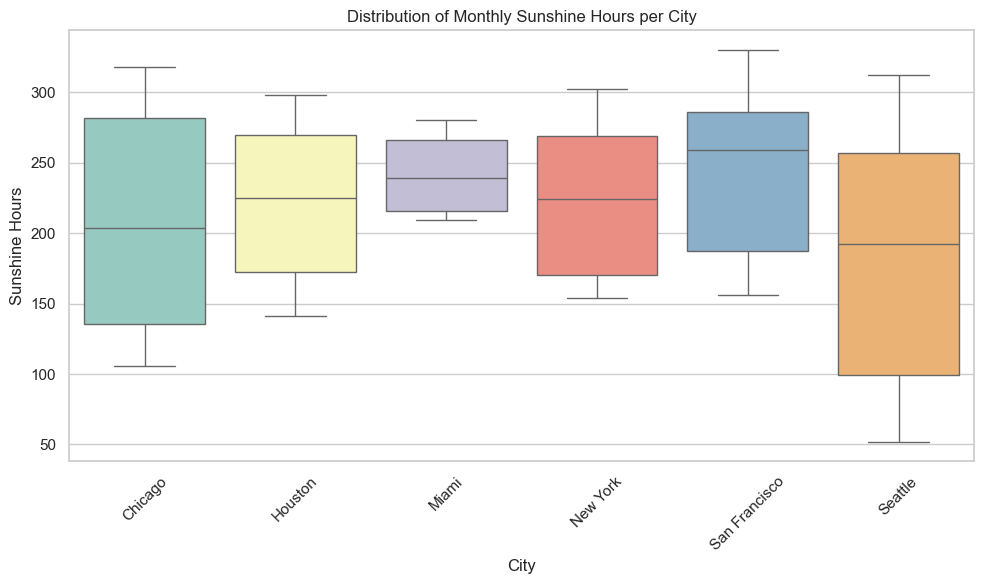

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set the style for seaborn
sns.set(style="whitegrid")

# Create a box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='city', y='sunshine', data=data, palette="Set3")

# Customize the plot
plt.title('Distribution of Monthly Sunshine Hours per City')
plt.xlabel('City')
plt.ylabel('Sunshine Hours')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


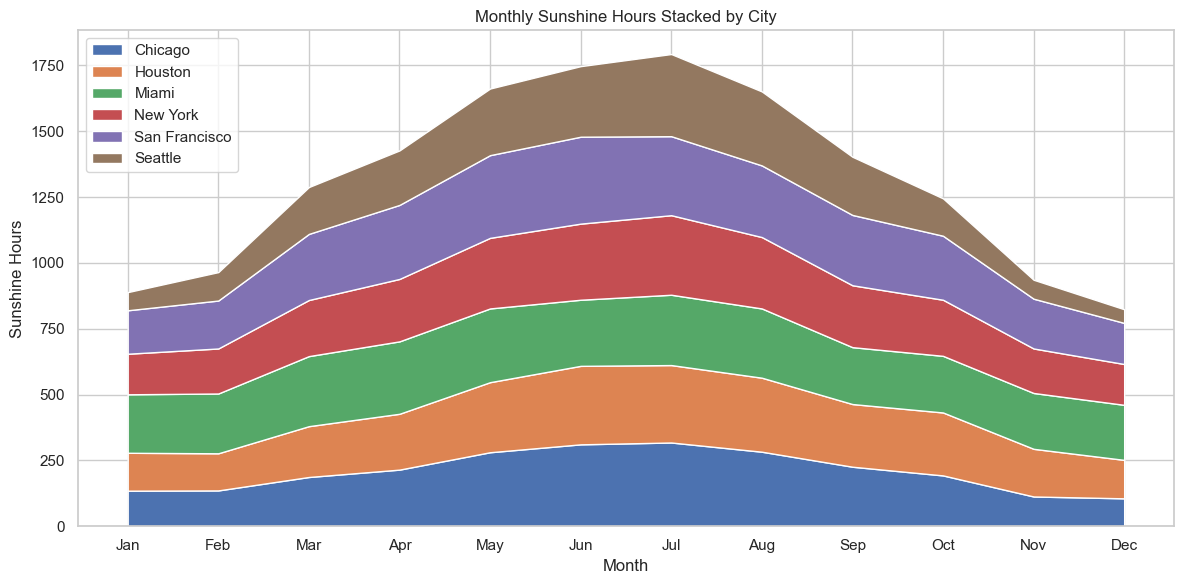

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


# Ensure the months are in the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a pivot table with months as the index and cities as columns
pivot_table = data.pivot_table(values='sunshine', index='month', columns='city')

# Reindex the pivot table to ensure months are in the correct order
pivot_table = pivot_table.reindex(month_order)

# Replace any missing values with zero
pivot_table = pivot_table.fillna(0)

# Plot the stacked area chart
plt.figure(figsize=(12, 6))
plt.stackplot(range(len(month_order)), pivot_table.values.T, labels=pivot_table.columns)

# Customize the x-axis to display month labels
plt.xticks(range(len(month_order)), month_order)

# Customize the plot
plt.title('Monthly Sunshine Hours Stacked by City')
plt.xlabel('Month')
plt.ylabel('Sunshine Hours')
plt.legend(loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


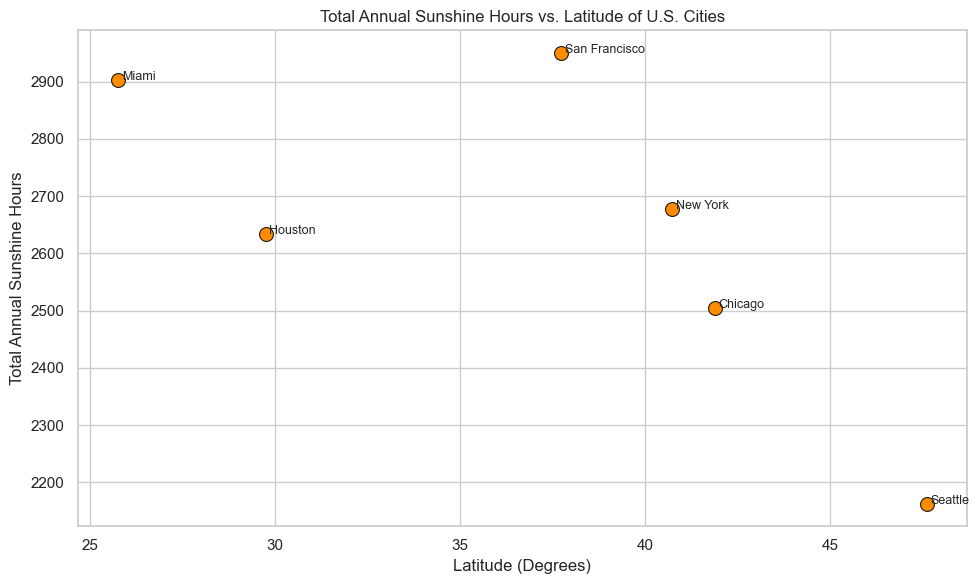

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the total annual sunshine hours for each city
annual_sunshine = data.groupby(['city', 'lat'])['sunshine'].sum().reset_index()

# Set the style for seaborn
sns.set(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lat', y='sunshine', data=annual_sunshine, s=100, color='darkorange', edgecolor='k')

# Add labels for each point (city names)
for index, row in annual_sunshine.iterrows():
    plt.text(row['lat'] + 0.1, row['sunshine'], row['city'], fontsize=9)

# Customize the plot
plt.title('Total Annual Sunshine Hours vs. Latitude of U.S. Cities')
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Total Annual Sunshine Hours')
plt.tight_layout()

# Display the plot
plt.show()


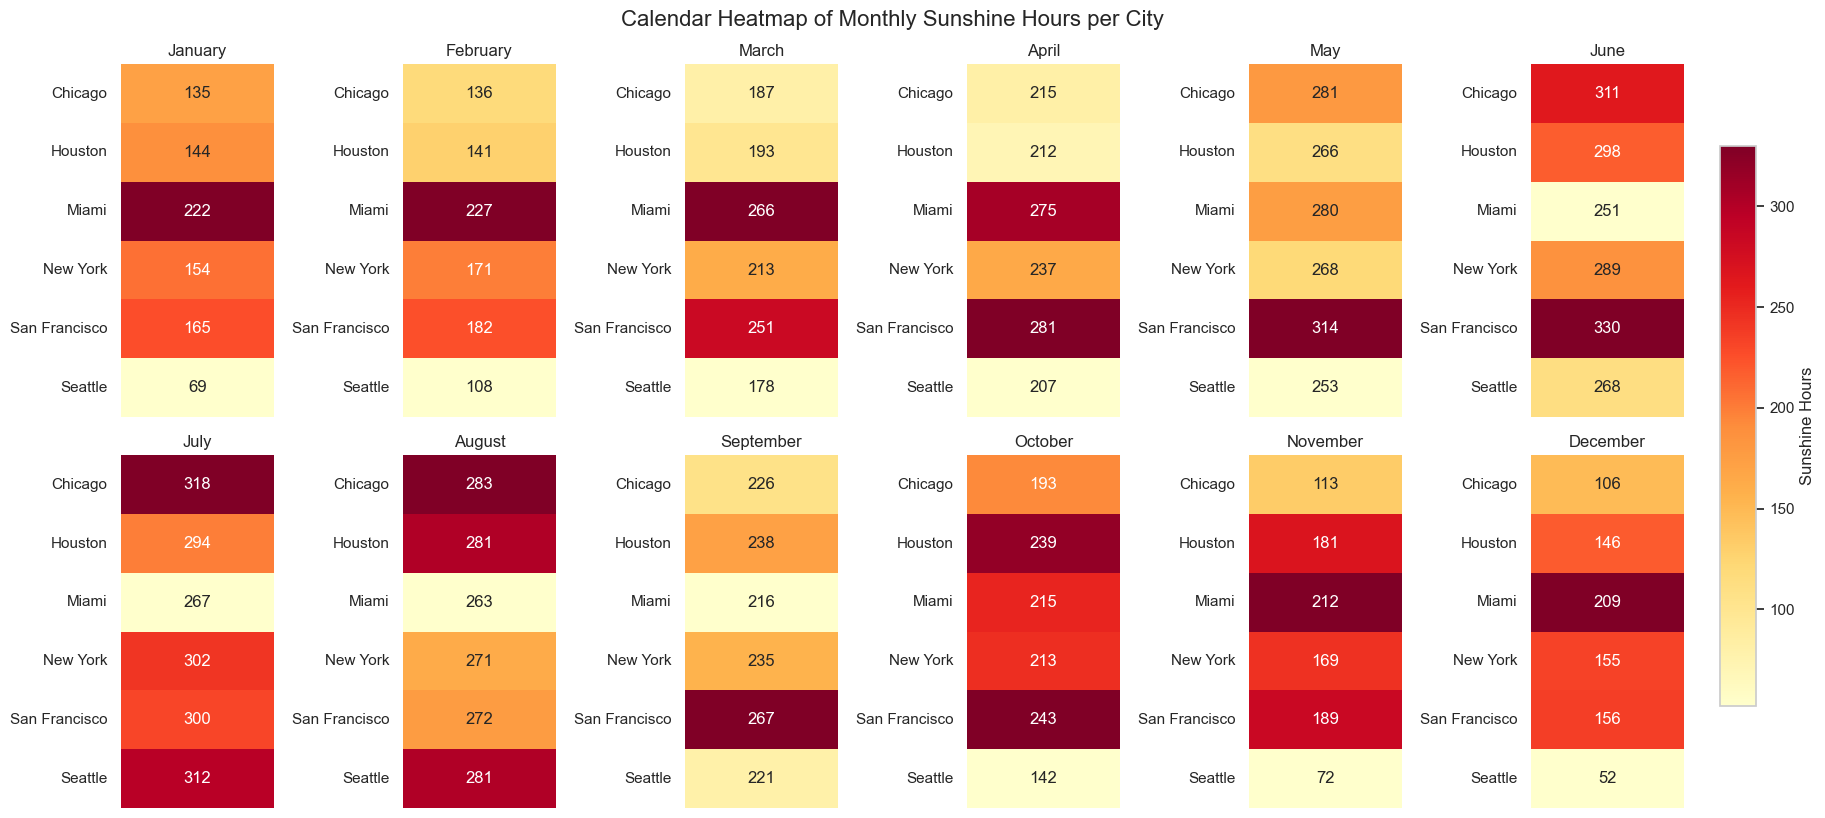

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar



# Ensure the months are in the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_to_num = {month: i+1 for i, month in enumerate(month_order)}
data['month_num'] = data['month'].map(month_to_num)

# Create a pivot table to reshape the data for the heatmap
pivot_table = data.pivot(index='city', columns='month_num', values='sunshine')

# Sort the columns to ensure correct month order
pivot_table = pivot_table[sorted(pivot_table.columns)]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Define a color map
cmap = sns.color_palette("YlOrRd", as_cmap=True)

# Loop over each month and create a heatmap cell
for idx, month_num in enumerate(sorted(pivot_table.columns)):
    ax = axes[idx]
    # Extract the data for the current month
    month_data = pivot_table[[month_num]]
    # Create the heatmap for the current month
    sns.heatmap(
        month_data,
        annot=True,
        fmt=".0f",
        cmap=cmap,
        cbar=False,
        ax=ax,
        yticklabels=True
    )
    # Customize the subplot
    ax.set_title(calendar.month_name[month_num])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', labelrotation=0)

# Adjust layout and add a single color bar on the side
fig.tight_layout(rect=[0, 0, 0.95, 1])
cbar_ax = fig.add_axes([0.96, 0.15, 0.02, 0.7])
norm = plt.Normalize(vmin=pivot_table.min().min(), vmax=pivot_table.max().max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, cax=cbar_ax, label='Sunshine Hours')

# Add a main title
fig.suptitle('Calendar Heatmap of Monthly Sunshine Hours per City', fontsize=16, y=1.02)

# Display the plot
plt.show()


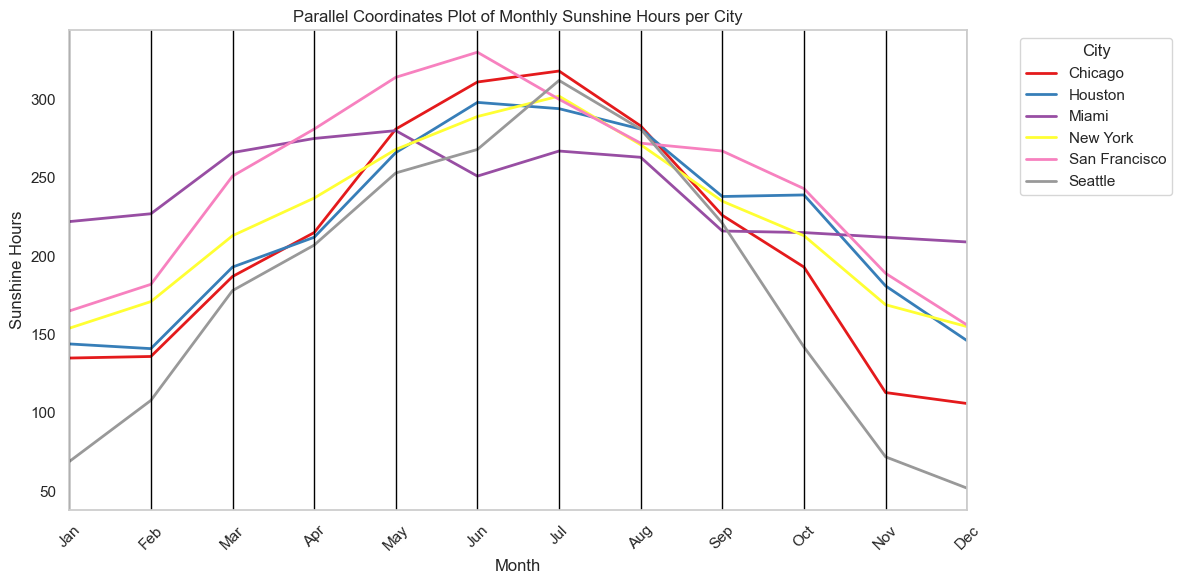

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import seaborn as sns


# Ensure the months are in the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_to_num = {month: i for i, month in enumerate(month_order)}
data['month_num'] = data['month'].map(month_to_num)

# Pivot the data to have months as columns and cities as rows
pivot_table = data.pivot_table(values='sunshine', index='city', columns='month', aggfunc='mean')
pivot_table = pivot_table[month_order]  # Ensure correct month order

# Reset the index to bring 'city' back as a column
pivot_table.reset_index(inplace=True)

# Set Seaborn style
sns.set(style="whitegrid")

# Create the parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(pivot_table, 'city', colormap='Set1', linewidth=2)

# Customize the plot
plt.title('Parallel Coordinates Plot of Monthly Sunshine Hours per City')
plt.xlabel('Month')
plt.ylabel('Sunshine Hours')
plt.xticks(rotation=45)
plt.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Display the plot
plt.show()


/tmp/ipykernel_101644/3651215631.py:55: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


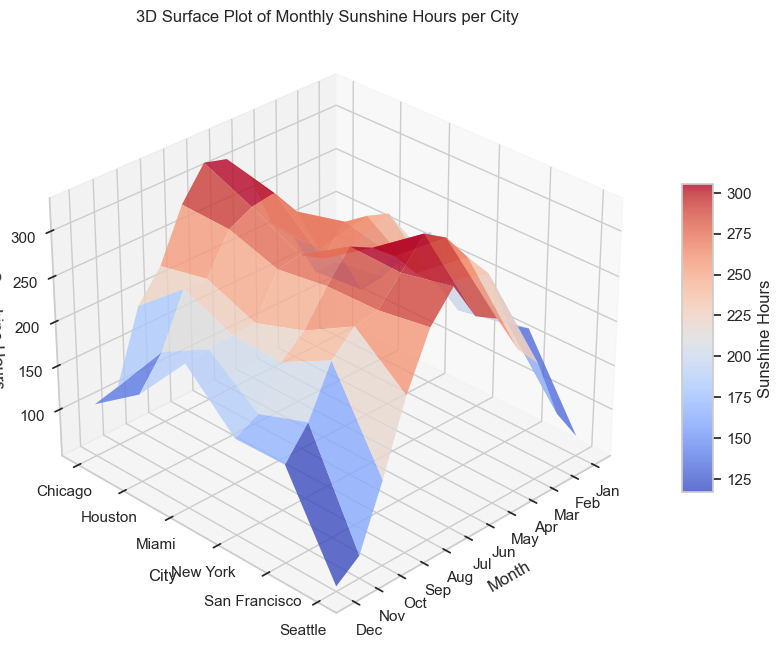

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm


# Ensure the months are in the correct order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_to_num = {month: i+1 for i, month in enumerate(month_order)}
data['month_num'] = data['month'].map(month_to_num)

# Pivot the data to have months as columns and cities as rows
pivot_table = data.pivot_table(values='sunshine', index='city', columns='month_num')
pivot_table = pivot_table[sorted(pivot_table.columns)]  # Ensure correct month order

# Prepare data for the 3D surface plot
X = np.arange(1, 13)  # Months from 1 to 12
Y = np.arange(len(pivot_table.index))  # Number of cities
X, Y = np.meshgrid(X, Y)
Z = pivot_table.values

# Create a figure and a 3D axis
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, edgecolor='none', alpha=0.8)

# Customize the z-axis
ax.set_zlim(Z.min(), Z.max())

# Add labels
ax.set_xlabel('Month')
ax.set_ylabel('City')
ax.set_zlabel('Sunshine Hours')
ax.set_title('3D Surface Plot of Monthly Sunshine Hours per City')

# Set x-axis ticks and labels (Months)
ax.set_xticks(np.arange(1, 13))
ax.set_xticklabels(month_order)

# Set y-axis ticks and labels (Cities)
ax.set_yticks(np.arange(len(pivot_table.index)))
ax.set_yticklabels(pivot_table.index)

# Add a color bar to map the colors to z values
fig.colorbar(surf, shrink=0.5, aspect=10, label='Sunshine Hours')

# Adjust the view angle for better visualization
ax.view_init(elev=30, azim=45)

# Display the plot
plt.tight_layout()
plt.show()


In [17]:
!pip install --upgrade bokeh pandas pyproj




Defaulting to user installation because normal site-packages is not writeable


In [18]:
!pip install geodatasets

Defaulting to user installation because normal site-packages is not writeable


In [19]:
import pandas as pd
import geopandas as gpd
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, ColumnDataSource, HoverTool, Select, LinearColorMapper
from bokeh.layouts import column
from bokeh.palettes import Viridis256


climate_data = pd.read_csv(file_path)

# Calculate annual sunshine hours for each city
annual_sunshine = climate_data.groupby('city')['sunshine'].sum().reset_index()
climate_data = climate_data.merge(annual_sunshine, on='city', suffixes=('', '_annual'))

# Load US states shapefile (replace 'path_to_shapefile' with your local path)
us_states = gpd.read_file('s_05mr24/s_05mr24.shp')

# Create a Bokeh figure
p = figure(title="US Cities Sunshine Hours", 
           x_axis_label='Longitude', y_axis_label='Latitude',
           width=1000, height=600,
           x_range=(-125, -65), y_range=(25, 50))

# Add US states to the map
states_source = GeoJSONDataSource(geojson=us_states.to_json())
p.patches('xs', 'ys', source=states_source, fill_alpha=0.2, line_color="black", line_width=0.5)

# Prepare data source for cities
source = ColumnDataSource(climate_data)

# Create a color mapper for annual sunshine hours
color_mapper = LinearColorMapper(palette=Viridis256, low=climate_data['sunshine_annual'].min(), high=climate_data['sunshine_annual'].max())

# Add circles for cities
circles = p.circle(x='lon', y='lat', size='sunshine', color={'field': 'sunshine_annual', 'transform': color_mapper},
                   source=source, alpha=0.6)

# Add hover tool
hover = HoverTool(tooltips=[
    ("City", "@city"),
    ("Month", "@month"),
    ("Sunshine Hours", "@sunshine"),
    ("Annual Sunshine Hours", "@sunshine_annual")
])
p.add_tools(hover)

# Create widgets for filtering
month_select = Select(title="Month", value="All", options=["All"] + list(climate_data['month'].unique()))
city_select = Select(title="City", value="All", options=["All"] + list(climate_data['city'].unique()))

# Callback function for updating the plot
def update_plot(attr, old, new):
    selected_month = month_select.value
    selected_city = city_select.value
    
    filtered_data = climate_data
    
    if selected_month != "All":
        filtered_data = filtered_data[filtered_data['month'] == selected_month]
    if selected_city != "All":
        filtered_data = filtered_data[filtered_data['city'] == selected_city]
    
    source.data = filtered_data

# Attach callbacks to widgets
month_select.on_change('value', update_plot)
city_select.on_change('value', update_plot)

# Create layout
layout = column(p, month_select, city_select)

# Output to file
output_file("us_cities_sunshine.html")

# Show the plot
show(layout)

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/js_callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [20]:
from bokeh.models import Slider

In [4]:
# Step 1: Calculate the total average sunshine (all cities, all months)
total_average_sunshine = climate_data['sunshine'].mean()

print("Total Average Sunshine (all cities, all months):", total_average_sunshine)

# Step 2: Create a new DataFrame with the relative sunshine (sunshine of each month in a city minus the total average)
climate_data_relative = climate_data.copy()

# Subtract the total average sunshine from the sunshine column to get the relative sunshine
climate_data_relative['relative_sunshine'] = climate_data_relative['sunshine'] - total_average_sunshine

# Step 3: Display the new DataFrame
print(climate_data_relative[['city', 'month', 'sunshine', 'relative_sunshine']])


Total Average Sunshine (all cities, all months): 219.86111111111111
       city month  sunshine  relative_sunshine
0   Chicago   Jan       135         -84.861111
1   Chicago   Feb       136         -83.861111
2   Chicago   Mar       187         -32.861111
3   Chicago   Apr       215          -4.861111
4   Chicago   May       281          61.138889
..      ...   ...       ...                ...
67  Seattle   Aug       281          61.138889
68  Seattle   Sep       221           1.138889
69  Seattle   Oct       142         -77.861111
70  Seattle   Nov        72        -147.861111
71  Seattle   Dec        52        -167.861111

[72 rows x 4 columns]


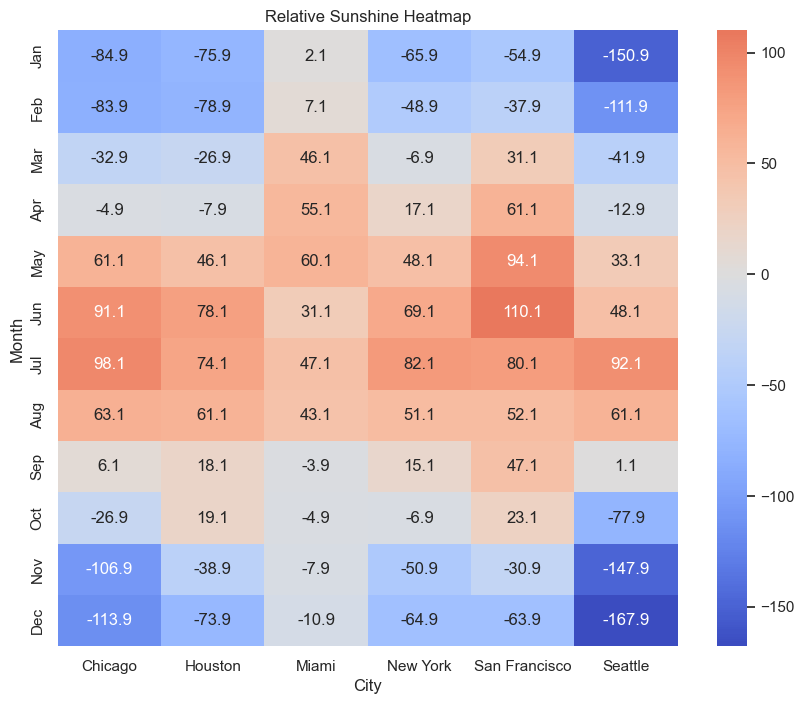

In [7]:
# Pivot the data for heatmap
heatmap_data = climate_data_relative.pivot(index="month", columns="city", values="relative_sunshine")

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="coolwarm", center=0)

plt.title('Relative Sunshine Heatmap')
plt.xlabel('City')
plt.ylabel('Month')
plt.show()


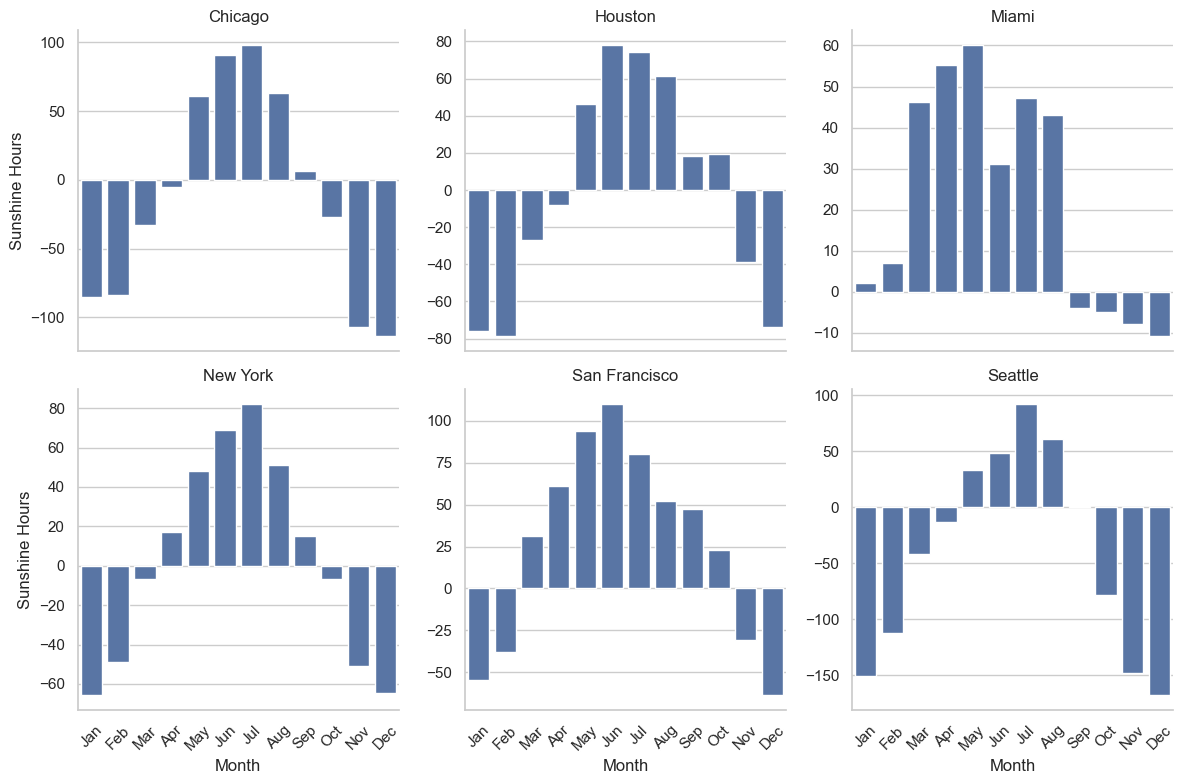

In [8]:
# Facet grid
g = sns.FacetGrid(climate_data_relative, col="city", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.barplot, x="month", y="relative_sunshine", order=months_order)

g.set_titles("{col_name}")
g.set_axis_labels("Month", "Sunshine Hours")
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
plt.tight_layout()
plt.show()


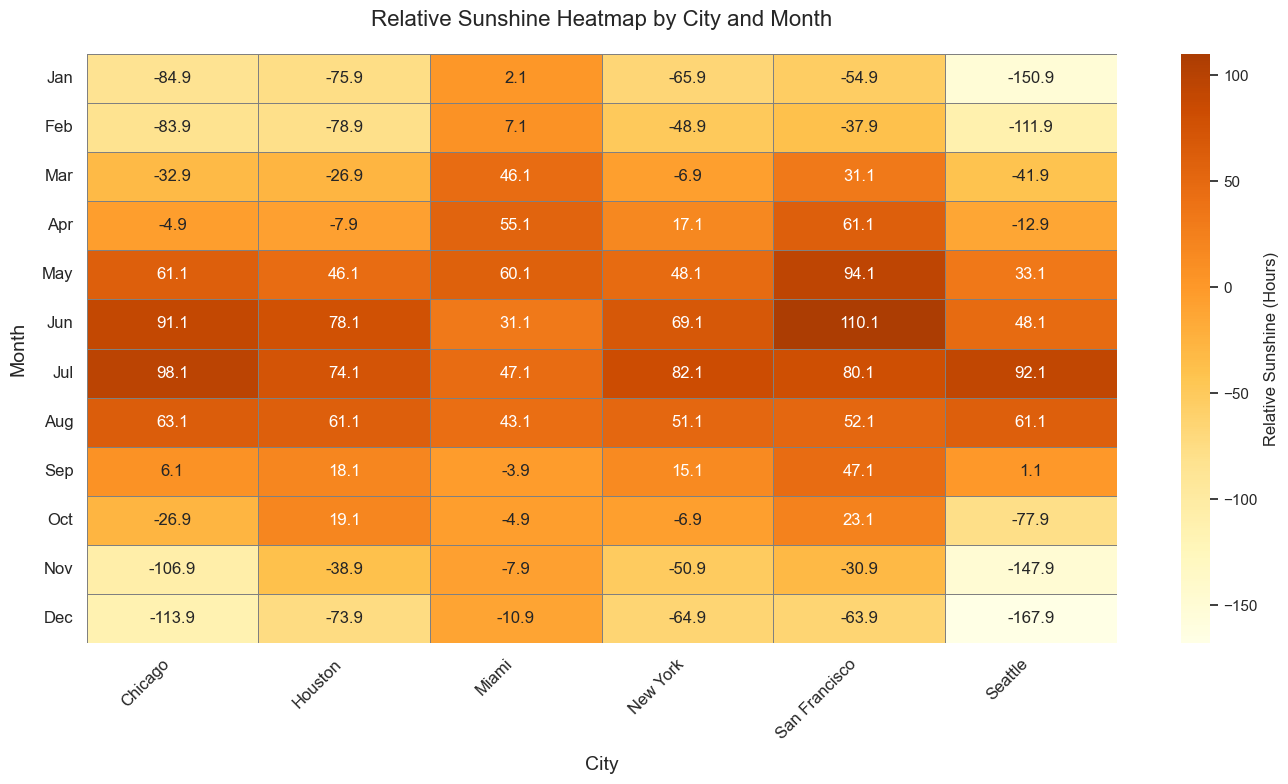

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming climate_data_relative is already defined

# Define the order of months
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert 'month' to categorical
climate_data_relative['month'] = pd.Categorical(
    climate_data_relative['month'], categories=months_order, ordered=True)

# Pivot the DataFrame
heatmap_data = climate_data_relative.pivot(
    index='month', 
    columns='city', 
    values='relative_sunshine'
)

# Set the visual style
sns.set(style="whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(14, 8))

# Create the heatmap with the new colormap
heatmap = sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".1f", 
    cmap="YlOrBr",          # Updated colormap
    linewidths=.5, 
    linecolor='gray', 
    cbar_kws={'label': 'Relative Sunshine (Hours)'},
    center=0
)

# Customize the axes and title
plt.title('Relative Sunshine Heatmap by City and Month', fontsize=16, pad=20)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.ylabel('Month', fontsize=14, labelpad=10)

# Improve tick label visibility
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Display the heatmap
plt.tight_layout()
plt.show()
